In [8]:
import pandas as pd
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
fname = "data/ev_sales/BEV-PHEV-HEV-FCEV Sales By State for 2011-2021-EVAdoption.xlsx"
sample_df = pd.read_excel(fname, sheet_name = '2013')

In [12]:
# start_year = 2011
# end_year = 2019
# new_cols = [" ".join(i.split()[1:]) if len(i.split()) > 1 else i for i in sample_df.columns  ]
# df = pd.DataFrame(columns=new_cols)
# for year in range(start_year, end_year):
#     t_df = pd.read_excel(fname, sheet_name="{}".format(year))
#     t_df.columns = new_cols
#     t_df['year'] = str(year)
#     df = df.append(t_df)
    
start_year = 2013
end_year = 2019
read_cols = ["State"]
market_share_cols = ["FCEV Market Share", "BEV Market Share", "PHEV Market Share"]
read_cols = read_cols + market_share_cols
df = pd.DataFrame(columns=read_cols)
for year in range(start_year, end_year):
    filter_cols = ["{} {}".format(year, j) if i>0 else j for i, j in enumerate(read_cols)]
    t_df = pd.read_excel(fname, sheet_name="{}".format(year), usecols=filter_cols)
    t_df.columns = read_cols
    t_df['year'] = str(year)
    df = df.append(t_df)

C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_35460\1539148954.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_35460\1539148954.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_35460\1539148954.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_35460\1539148954.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_35460\153914895

In [13]:
df

,State,FCEV Market Share,BEV Market Share,PHEV Market Share,year
0,Alabama,0,0.0004,0.0005,2013
1,Alaska,0,0.0007,0.001,2013
2,Arizona,0,0.0023,0.0017,2013
3,Arkansas,0,0.0002,0.0006,2013
4,California,0,0.0129,0.0108,2013
...,...,...,...,...,...
47,Washington,0.0,0.0306,0.0122,2018
48,West Virginia,0.0,0.0012,0.0015,2018
49,Wisconsin,0.0,0.0047,0.0032,2018
50,Wyoming,0.0,0.0023,0.0012,2018


In [14]:
combined_ev_market_share_df = df.groupby(['State'])[market_share_cols].sum().reset_index()

In [15]:
combined_ev_market_share_df['State'] = combined_ev_market_share_df['State'].replace("District of Columbia", "District Of Columbia")

In [16]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = combined_ev_market_share_df.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [17]:
mdf

,State,FCEV Market Share,BEV Market Share,PHEV Market Share,State Name,State Code,EPA Region
0,Alabama,0.0000,0.0051,0.0056,Alabama,1.0,4.0
1,Alaska,0.0000,0.0090,0.0105,Alaska,2.0,10.0
2,Arizona,0.0000,0.0311,0.0169,Arizona,4.0,9.0
3,Arkansas,0.0000,0.0037,0.0047,Arkansas,5.0,6.0
4,California,0.0024,0.1388,0.1149,California,6.0,9.0
5,Colorado,0.0000,0.0463,0.0262,Colorado,8.0,8.0
6,Connecticut,0.0000,0.0276,0.0330,Connecticut,9.0,1.0
7,Delaware,0.0000,0.0139,0.0231,Delaware,10.0,3.0
8,District Of Columbia,0.0000,0.0443,0.0430,District Of Columbia,11.0,3.0
9,Florida,0.0000,0.0179,0.0122,Florida,12.0,4.0


In [18]:
# mdf['ev_sales'] = mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] + mdf["HEV Sales"]
mdf['ev_market_share'] =  mdf["FCEV Market Share"] + mdf["BEV Market Share"] +  mdf["PHEV Market Share"] 

In [19]:
mdf

,State,FCEV Market Share,BEV Market Share,PHEV Market Share,State Name,State Code,EPA Region,ev_market_share
0,Alabama,0.0000,0.0051,0.0056,Alabama,1.0,4.0,0.0107
1,Alaska,0.0000,0.0090,0.0105,Alaska,2.0,10.0,0.0195
2,Arizona,0.0000,0.0311,0.0169,Arizona,4.0,9.0,0.0480
3,Arkansas,0.0000,0.0037,0.0047,Arkansas,5.0,6.0,0.0084
4,California,0.0024,0.1388,0.1149,California,6.0,9.0,0.2561
5,Colorado,0.0000,0.0463,0.0262,Colorado,8.0,8.0,0.0725
6,Connecticut,0.0000,0.0276,0.0330,Connecticut,9.0,1.0,0.0606
7,Delaware,0.0000,0.0139,0.0231,Delaware,10.0,3.0,0.0370
8,District Of Columbia,0.0000,0.0443,0.0430,District Of Columbia,11.0,3.0,0.0873
9,Florida,0.0000,0.0179,0.0122,Florida,12.0,4.0,0.0301


In [18]:
# total_us_ev_market_share = mdf[mdf['State'] == 'Total US']['ev_market_share'].tolist()[0]
# mdf['us_percent'] = (mdf['ev_sales']*100)/total_us_ev_sales

In [20]:
mdf

,State,FCEV Market Share,BEV Market Share,PHEV Market Share,State Name,State Code,EPA Region,ev_market_share
0,Alabama,0.0000,0.0051,0.0056,Alabama,1.0,4.0,0.0107
1,Alaska,0.0000,0.0090,0.0105,Alaska,2.0,10.0,0.0195
2,Arizona,0.0000,0.0311,0.0169,Arizona,4.0,9.0,0.0480
3,Arkansas,0.0000,0.0037,0.0047,Arkansas,5.0,6.0,0.0084
4,California,0.0024,0.1388,0.1149,California,6.0,9.0,0.2561
5,Colorado,0.0000,0.0463,0.0262,Colorado,8.0,8.0,0.0725
6,Connecticut,0.0000,0.0276,0.0330,Connecticut,9.0,1.0,0.0606
7,Delaware,0.0000,0.0139,0.0231,Delaware,10.0,3.0,0.0370
8,District Of Columbia,0.0000,0.0443,0.0430,District Of Columbia,11.0,3.0,0.0873
9,Florida,0.0000,0.0179,0.0122,Florida,12.0,4.0,0.0301


In [21]:
mdf = mdf[~mdf['State Code'].isin(EXCLUDE_STATES)]
mdf_carb = mdf[mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf[~mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf_noncarb[mdf_noncarb['State']!='Total US']

In [21]:
mdf_carb['us_percent'].sum(), mdf_noncarb['us_percent'].sum()

(63.191871129329954, 26.088399376604013)

In [28]:
mdf_carb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_zev_sales", start_year, end_year), index=False)
mdf_noncarb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_zev_sales", start_year, end_year), index=False)

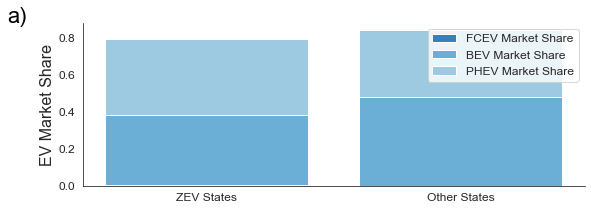

In [22]:
plt.rcParams.update({'font.size': 12})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

fig, ax = plt.subplots(figsize=(9,3))
ax.text(-0.15, 1, "a)", transform=ax.transAxes, size=22, color='black')

label = ['ZEV States', 'Other States']
fcev_sales = [mdf_carb['FCEV Market Share'].sum(), mdf_noncarb['FCEV Market Share'].sum()]
bev_sales = [mdf_carb['BEV Market Share'].sum(), mdf_noncarb['BEV Market Share'].sum()]
phev_sales = [mdf_carb['PHEV Market Share'].sum(), mdf_noncarb['PHEV Market Share'].sum()]
y1 = fcev_sales[0] + bev_sales[0] + phev_sales[0]
y2 = fcev_sales[1] + bev_sales[1] + phev_sales[1]

# ax.text(-0.05, y1, "{:.2f}%".format(mdf_carb['us_percent'].sum())) 
# ax.text(0.95, y2, "{:.2f}%".format(mdf_noncarb['us_percent'].sum())) 

plt.bar(label, fcev_sales, label = 'FCEV Market Share', color = cmap(0))
plt.bar(label, bev_sales, bottom = fcev_sales, label = 'BEV Market Share', color = cmap(1))
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], label='PHEV Market Share', color = cmap(2))
plt.legend(loc='upper right')
plt.ylabel("EV Market Share", size=16)
sns.despine()
plt.savefig("{}/{}.png".format(OUTPUT_IMAGE, "zev_sales_d"), bbox_inches='tight')
plt.show()

In [23]:
epa_region[epa_region['State Code'].isin(EXCLUDE_STATES)]

,State Name,State Code,EPA Region
102,Arizona,4,9
250,Colorado,8,8
322,Delaware,10,3
325,District Of Columbia,11,3
1322,Minnesota,27,5
1805,New Mexico,35,6
2254,Pennsylvania,42,3
2966,Washington,53,10


In [ ]:
epa_region[epa_region['State Name'] == 'Minnesota']

In [ ]:
mdf_carb